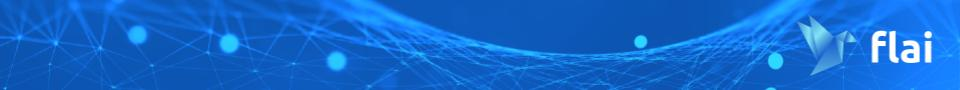

# **Modelo para Previsão de Fraudes em Cartão de Crédito**
 

  
https://www.kaggle.com/mlg-ulb/creditcardfraud


---
## **Objetivo**


Entender e resolver o problema de desbalanceamento na variável resposta em problemas de classificação binária.

---
## **Importação dos Dados**

In [ ]:
# importação dos dados direto do site da UCI
import pandas as pd

caminho = '/content/creditcard.csv' 

dados = pd.read_csv(caminho)  
dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dados['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
dados.shape

(284807, 31)

In [ ]:
dados['Class'].value_counts()/dados.shape[0]

0    0.998273
1    0.001727
Name: Class, dtype: float64

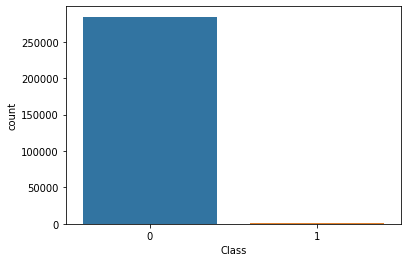

In [ ]:
import seaborn as sns

sns.countplot(x = dados['Class']);

---
## **Por qual razão as técnicas usuais falham em conjuntos desbalanceados?**

In [ ]:
def AmostraEstratificada(dados, tamanho): 
    n1 = round(tamanho*dados['Class'].mean())
    n0 = tamanho - n1

    zeros = dados[dados['Class'] == 0]
    uns = dados[dados['Class'] == 1] 

    am0 = zeros.sample(n0)
    am1 = uns.sample(n1)

    amostra = pd.concat([am0, am1])
    resto = dados.drop(amostra.index)

    return amostra, resto

In [ ]:
validacao, treinamento = AmostraEstratificada(dados, dados.shape[0] - 200000)

In [ ]:
print(treinamento.shape)
print(treinamento['Class'].mean())

print(validacao.shape)
print(validacao['Class'].mean())

(200000, 31)
0.001725
(84807, 31)
0.0017333474831087057


In [ ]:
amostra15k, _ = AmostraEstratificada(dados, 15000)

In [ ]:
print(amostra15k.shape)

(15000, 31)


---

## **Experimento Base**

In [ ]:
!pip install pycaret 

In [ ]:
?setup


Object `setup` not found.


In [ ]:
# Modelos considerados nessa analise
 
modelos = ['rf']

In [ ]:
from pycaret.classification import pull, setup, models, create_model, compare_models, tune_model, predict_model, plot_model, predict_model, evaluate_model, finalize_model, save_model

In [ ]:
# Configuração da Modelagem automática feita pelo PyCaret
# Envolve os procedimentos de validação quanto de pré-processamento

modelagem = setup(data = amostra15k, target = 'Class', test_data = validacao) 
modelo = compare_models(include = modelos)
pred = predict_model(modelo)
base = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9991,0.9226,0.6,0.9167,0.7,0.6996,0.7273,3.199


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9993,0.9299,0.6803,0.9009,0.7752,0.7749,0.7825


---
## **Undersampling**


In [ ]:
def UnderSampling(dados, under = 1):
    classe0 = dados[dados['Class'] == 0]
    classe1 = dados[dados['Class'] == 1]  
    
    amostra0 = classe0.sample(under * classe1.shape[0])
    under = pd.concat([amostra0, classe1])

    return under

In [ ]:
under1 = UnderSampling(treinamento, 1)  
under5 = UnderSampling(treinamento, 5)
under10 = UnderSampling(treinamento, 10)
under25 = UnderSampling(treinamento, 25)  
under40 = UnderSampling(treinamento, 40)  

print(under1.shape) 
print(under5.shape)
print(under10.shape)
print(under25.shape) 
print(under40.shape) 

(690, 31)
(2070, 31)
(3795, 31)
(8970, 31)
(14145, 31)


---

In [ ]:
modelagem = setup(data = under1, target = 'Class', test_data = validacao ) 
modelo = compare_models(include = modelos)
pred = predict_model(modelo)
u1 = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9348,0.98,0.8985,0.9682,0.931,0.8695,0.8731,0.565


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9697,0.9771,0.9048,0.0494,0.0937,0.0907,0.2075


---

---

In [ ]:
modelagem = setup(data = under5, target = 'Class', test_data = validacao ) 
modelo = compare_models(include = modelos )
pred = predict_model(modelo)
u2 = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.972,0.9746,0.8466,0.9829,0.9076,0.8913,0.8961,0.976


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9979,0.9791,0.8776,0.4495,0.5945,0.5935,0.6272


---

In [ ]:
modelagem = setup(data = under10, target = 'Class', test_data = validacao ) 
modelo = compare_models(include = modelos )
pred = predict_model(modelo)
u3 = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9839,0.9686,0.8404,0.9819,0.9035,0.8949,0.8993,1.588


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9989,0.9776,0.8639,0.6225,0.7236,0.7231,0.7329


---

In [ ]:
modelagem = setup(data = under25, target = 'Class', test_data = validacao ) 
modelo = compare_models(include = modelos )
pred = predict_model(modelo)
u4 = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9924,0.9596,0.8293,0.971,0.8918,0.8879,0.8923,3.606


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9993,0.9759,0.8571,0.7636,0.8077,0.8073,0.8087


---

In [ ]:
modelagem = setup(data = under40, target = 'Class', test_data = validacao ) 
modelo = compare_models(include = modelos )
pred = predict_model(modelo)
u5 = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9951,0.9674,0.8172,0.9759,0.8875,0.885,0.8897,5.866


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9993,0.9701,0.8639,0.7697,0.8141,0.8138,0.8151


---
## **Oversampling**


In [ ]:
def UnderOverSampling(dados, under = 1, over = 1):
    classe0 = dados[dados['Class'] == 0]
    classe1 = dados[dados['Class'] == 1]  

    amostra0 = classe0.sample(under * classe1.shape[0])
    amostra1 = pd.concat([classe1] * over, ignore_index=True)
    tudo = pd.concat([amostra0, amostra1])

    return tudo

In [ ]:
underover1 = UnderOverSampling(treinamento, under = 20, over = 4)
underover2 = UnderOverSampling(treinamento, under = 20, over = 8)
underover3 = UnderOverSampling(treinamento, under = 20, over = 12)
underover4 = UnderOverSampling(treinamento, under = 20, over = 16)
underover5 = UnderOverSampling(treinamento, under = 20, over = 20)

print(underover1.shape)
print(underover2.shape)
print(underover3.shape)
print(underover4.shape)
print(underover5.shape)  

(8280, 31)
(9660, 31)
(11040, 31)
(12420, 31)
(13800, 31)


---

In [ ]:
modelagem = setup(data = underover1, target = 'Class', test_data = validacao ) 
modelo = compare_models(include = modelos )
pred = predict_model(modelo)
o1 = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9996,1.0,1.0,0.9979,0.9989,0.9987,0.9987,2.958


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.999,0.9775,0.8776,0.6482,0.7457,0.7452,0.7538


---

In [ ]:
modelagem = setup(data = underover2, target = 'Class', test_data = validacao ) 
modelo = compare_models(include = modelos )
pred = predict_model(modelo)
o2 = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9997,1.0,1.0,0.9989,0.9995,0.9992,0.9992,2.811


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9991,0.9787,0.8707,0.6809,0.7642,0.7637,0.7695


---

In [ ]:
modelagem = setup(data = underover3, target = 'Class', test_data = validacao ) 
modelo = compare_models(include = modelos )
pred = predict_model(modelo)
o3 = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9992,0.9999,1.0,0.9978,0.9989,0.9983,0.9983,2.724


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9991,0.9781,0.8707,0.7033,0.7781,0.7777,0.7821


---

In [ ]:
modelagem = setup(data = underover4, target = 'Class', test_data = validacao ) 
modelo = compare_models(include = modelos)
pred = predict_model(modelo)
o4 = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9998,1.0,1.0,0.9996,0.9998,0.9997,0.9997,2.738


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.999,0.9831,0.8707,0.6702,0.7574,0.7569,0.7634


---

In [ ]:
modelagem = setup(data = underover5, target = 'Class', test_data = validacao) 
modelo = compare_models(include = modelos)
pred = predict_model(modelo)
o5 = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9996,1.0,1.0,0.9993,0.9996,0.9993,0.9993,2.73


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9994,0.9817,0.8639,0.7888,0.8247,0.8244,0.8252


In [44]:
linhas = ['Base' ,'Under1','Under2','Under3','Under4','Under5','Over1','Over2','Over3','Over4','Over5']
resultados = pd.concat([base, u1, u2, u3, u4 , u5, o1, o2, o3, o4 ,o5])
resultados.index = linhas
resultados.drop(['Model'], axis = 1, inplace = True)
resultados.sort_values(by = 'F1', ascending = False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Over5,0.9994,0.9817,0.8639,0.7888,0.8247,0.8244,0.8252
Under5,0.9993,0.9701,0.8639,0.7697,0.8141,0.8138,0.8151
Under4,0.9993,0.9759,0.8571,0.7636,0.8077,0.8073,0.8087
Over3,0.9991,0.9781,0.8707,0.7033,0.7781,0.7777,0.7821
Base,0.9993,0.9299,0.6803,0.9009,0.7752,0.7749,0.7825
Over2,0.9991,0.9787,0.8707,0.6809,0.7642,0.7637,0.7695
Over4,0.9990,0.9831,0.8707,0.6702,0.7574,0.7569,0.7634
Over1,0.9990,0.9775,0.8776,0.6482,0.7457,0.7452,0.7538
Under3,0.9989,0.9776,0.8639,0.6225,0.7236,0.7231,0.7329
Under2,0.9979,0.9791,0.8776,0.4495,0.5945,0.5935,0.6272


---
## **Considerações Finais**

- Melhor Estratégia: Over5

- Comparação mais robusta entre cenários de over e under sampling
 
- Fazer um pré-processamento mais atencioso (considerar tratamento de outliers, normalizações, categorizações etc)

- Busca mais ampla no rol de modelos - fazer tunagem de hiperparâmetros (requer muito esforço computacional)

- Análise do problema de acordo com alguma métrica conectada ao négocio (análise FP vs FN, matriz de custo etc)

- Considerar técnicas mais robustas para esse propósito: **Near Miss** para undersampling e **SMOTE** (Synthetic Minority Oversampling Technique) para oversampling. 

- Biblioteca imblearn/pycaret